In [1]:
# Dataset: Amazon Books Reviews
# Author: Mohamed Bekheet
# Source: Mohamed Bekheet. (2022). Amazon Books Reviews [Data set]. Kaggle. https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
# URL: https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
# This dataset contains 2 files
# The first file** reviews** file contain feedback about 3M user on 212404 unique books the data set is 
# part of the Amazon review Dataset it contains product reviews and metadata from Amazon, including 
# 142.8 million reviews spanning May 1996 - July 2014.
# Reviews Dataset Data Dictionary:
# -id:                  The Id of Book
# -Title:   	        Book Title
# -Price:               The price of Book
# -User_id:             Id of the user who rates the book
# -profileName:         Name of the user who rates the book
# -review/helpfulness:  helpfulness rating of the review, e.g. 2/3
# -review/score:        rating from 0 to 5 for the book
# -review/time:         time of given the review
# -review/summary:      the summary of a text review
# -review/text:         the full text of a review

# The second file Books Details file contains details information about 212404 unique books it file is built by using
# google books API to get details information about books it rated in the first file
# and this file contains

# Book Details Dataset Data Dictionary:
# Title:	        Book Title
# Descripe:	        Decription of book
# authors:	        Name of book authors
# image:	        Url for book cover
# previewLink:	    Link to access this book on google Books
# publisher:	    Name of the publisheer
# publishedDate:	The date of publish
# infoLink:	        Link to get more information about the book on google books
# categories:	    Genres of books
# ratingsCount:	    Averaging rating for book

# Both Datasets are linked through the unique tittle of the book.

In [34]:
# Step 0. Load libraries and custom modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
from dateutil.parser import parse
from datetime import datetime
# ------------  PREPROCESING -------------
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
#-------------- TRANSFORMER --------------
import transformers
from transformers.pipelines import PIPELINE_REGISTRY
from transformers import pipeline
import evaluate
from evaluate import load
from transformers import Conversation
transformers.logging.set_verbosity_error()

In [3]:
#Loading the Datasets
df_rating_raw = pd.read_csv('../data/raw/Books_rating.csv')

df_rating_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [4]:
df_rating_raw.sample(10)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
2246724,1590592077,Flash Cartoon Animation: Learn from the Pros,23.51,A2UEE6PQ9DM6XD,Chluaid Manx,9/12,5.0,1044230400,Love your work,"Without the benefit of experience, animation c..."
2653511,B0006APNUQ,"West with the night,",NaN,A3F5QY6SAE6R5M,"Mourning Light ""mournlight""",9/10,5.0,1103328000,"Wonderful, wonderful use of language",I am aghast that this book is available for un...
2453217,0028634063,Betty Crocker Kids Cook!,NaN,A372OH9JIYO9VD,Nancy K. Umscheid,0/0,5.0,1229040000,Nancy,"Look for this book last Christmas,was so glad ..."
1964822,0854566163,The Trial of Charles I,NaN,A1YP7X8US0LKPB,Bill Dewey/Reclaiming Quarterly,1/1,5.0,1089849600,outstanding narrative history,This great narrative history of King Charles' ...
2901005,B000N7EFR4,A Pocket Style Manual,NaN,A18YIT1GK3KQOY,Erin Weller,13/13,5.0,1003104000,Standard issue at my school,I teach in a high school where we have just op...
2031050,0028643518,Behind Bars: Surviving Prison,9.64,NaN,NaN,7/7,5.0,1036281600,"Justice professions, police, judges, lawyers-R...",If you care about the people who are arrested ...
1663778,B000I0BMSG,Green Eggs and Ham (Living Books Interactive A...,NaN,A3QKJC9A3OFODZ,K.M.,0/0,5.0,1200096000,Great book for kids learning to talk and read,I bought this and a few other Dr Seuss books f...
508320,B000KFT58I,The Thanksgiving Visitor,NaN,NaN,NaN,3/16,2.0,948153600,A Christmas Memory,A Christmas memory by Truman Capote makes you ...
2719445,B0001PBYRW,Fingersmith,NaN,A62E37571HA5C,Shunzi,2/2,5.0,1326067200,Terrific,Great suspense from Sarah Waters. It is well-w...
752273,B000FQ4IA2,Golden Retrievers For Dummies (For Dummies (Co...,3.19,A3EXS4OJIZ67WR,suchai lee,1/22,5.0,984528000,goldenretriever,I would like looking to golden in usa. but i w...


In [5]:
#Load Books Data Dataset
df_data_raw = pd.read_csv('../data/raw/books_data.csv')

df_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [6]:
df_data_raw.sample(10)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
177965,A Certain Reputation (Signet Regency Romance),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162188,Dragonstar: Imperial Supply,Dragonstar is a unique space-fantasy campaign ...,['Fantasy Flight Games'],http://books.google.com/books/content?id=-5wwP...,http://books.google.com/books?id=-5wwPQAACAAJ&...,Fantasy Flight Pub Incorporated,2003-01-15,http://books.google.com/books?id=-5wwPQAACAAJ&...,['Games'],NaN
192110,Defiant Angel,"He can force her to marry, but her heart? That...",['Bella Moxie'],http://books.google.com/books/content?id=DJTwz...,http://books.google.com/books?id=DJTwzgEACAAJ&...,NaN,2022-03-31,http://books.google.com/books?id=DJTwzgEACAAJ&...,NaN,NaN
30796,Birdhouses: 20 Unique Woodworking Projects for...,NaN,['Mark Ramuz'],NaN,http://books.google.com/books?id=53eIzQEACAAJ&...,NaN,2011,http://books.google.com/books?id=53eIzQEACAAJ&...,['Birdhouses'],NaN
61312,Wedding Secrets (Silver Blades),Tori prepares a figure-skating routine as a we...,['Melissa Lowell'],http://books.google.com/books/content?id=mYAsx...,http://books.google.com/books?id=mYAsx9AtoAsC&...,Skylark,1996-12,http://books.google.com/books?id=mYAsx9AtoAsC&...,['Juvenile Fiction'],NaN
43966,Who Says There Are No Jobs Out There?: 25 Irre...,This volume explains how to ruthlessly tailor ...,['Bob Weinstein'],http://books.google.com/books/content?id=8sMtA...,http://books.google.com/books?id=8sMtAAAAYAAJ&...,NaN,1997,http://books.google.com/books?id=8sMtAAAAYAAJ&...,['Business & Economics'],NaN
25450,Princess Elizabeth and Princess Margaret Rose ...,NaN,['Mrs. Lisa Sheridan'],NaN,http://books.google.com/books?id=zzVWewAACAAJ&...,NaN,1941,http://books.google.com/books?id=zzVWewAACAAJ&...,NaN,NaN
166728,"Small Adobe House, The",Both an introduction to adobe structures and a...,['Agnesa Reeve'],http://books.google.com/books/content?id=WYMUd...,http://books.google.com/books?id=WYMUd8bTVFEC&...,Gibbs Smith,2001,http://books.google.com/books?id=WYMUd8bTVFEC&...,['Architecture'],NaN
71261,THE PILE WEAVES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76479,Running on Fumes (Hardy Boys: Undercover Broth...,"After a 2,700 mile motorcycle road trip, Frank...",['Franklin W. Dixon'],http://books.google.com/books/content?id=_l4fM...,http://books.google.com/books?id=_l4fMwAACAAJ&...,Perfection Learning,2005-06-01,http://books.google.com/books?id=_l4fMwAACAAJ&...,['Juvenile Fiction'],1.0


In [7]:
#Revisar Valores Nulos
df_rating_raw.isna().sum()

Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64

In [8]:
df_data_raw.isna().sum()

Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64

In [9]:
#Innecesary Columns are removed
# df_rating: 
#   - Price: Almost 84% of the entries are null. 
#   - profileName: User_id provides same information.
#   - Id: Innecesary column.
#   - review/helpfulness: Unncesary column for current analysis
#   - review/summary: Unncesary column for current analysis. Many summaries used are the same Book Title 
# df_data:
#   - image, previewLink, infoLink: Not useful information.
#   - ratingsCount: Information from Google API. Not useful for the analysis.
#   - description: Non necesary information for Analysis

df_rating_processed = df_rating_raw.drop(['Id','profileName','Price','review/helpfulness','review/summary'], axis=1).copy()
df_data_processed = df_data_raw.drop(['image','previewLink','infoLink','ratingsCount','description'], axis=1).copy()

In [10]:
df_rating_processed.sample(10)

,Title,User_id,review/score,review/time,review/text
713678,I Dared to Call Him Father,A2M5YMN2MZ3WIP,5.0,1353888000,Great book for any woman who wants to know how...
2069369,Dynamic HTML: The HTML Developer's Guide,NaN,5.0,932515200,"In all honestly, if you know nothing about web..."
1389094,Big If,AI4C9DDM0H2VI,3.0,1038960000,"This is an interesting book and I enjoyed it, ..."
1898520,"Direct foreign investment, multinational corpo...",AKZHAU3W8H9QH,4.0,1359763200,"As an avid fan of Masterpiece Theatre, I found..."
2360496,Book of Hours: Prayers to the Goddess,A1NFEFIZGZ3K89,5.0,1065312000,Llewellyn has outdone themselves with the pres...
15340,1984,A148R759F9JW0A,5.0,1330646400,"I first heard of this book when, at the age of..."
1185674,Lies at the Altar: The Truth About Great Marri...,AXMDALXZH053C,5.0,1344384000,Great book already have it in hardback. Wanted...
1867495,Great Rock Drummers Of The Sixties,A3G8B1TJE56J5Y,4.0,938044800,I appreciate this book because drummers often ...
833636,Mr. Midshipman Hornblower,NaN,5.0,932601600,One of the best books in the Hornblower saga.....
1813305,The history of the Peloponnesian War (Everyman...,A55MRYPUAX4QU,5.0,1074124800,Thucydides earned an honored spot among ancien...


In [11]:
df_rating_processed = df_rating_processed.rename(columns={'Title':'title', 
                                                        'User_id':'user_id',
                                                        'review/score': 'review',
                                                        'review/time': 'review_time',
                                                        'review/summary': 'summary',
                                                        'review/text': 'text'
                                                        })
df_data_processed = df_data_processed.rename(columns={'Title':'title', 
                                                        'publishedDate':'published_date'
                                                        })

In [12]:
df_rating_processed.isna().sum()

title             208
user_id        561787
review              0
review_time         0
text                8
dtype: int64

In [13]:
df_data_processed.isna().sum()

title                 1
authors           31413
publisher         75886
published_date    25305
categories        41199
dtype: int64

In [14]:
#CLEAN THE DATASETS

In [15]:
#As both datasets are going to be merged by Title, Rows with Null Title are removed.
df_rating_processed = df_rating_processed.dropna(subset=['title', 'text'], how='any')

df_data_processed = df_data_processed.dropna(subset=['title'])

#Drop rows where everything except title is null
df_data_processed = df_data_processed.dropna(subset=['authors', 'publisher', 'published_date', 'categories'], how='all')

In [16]:
df_data_processed.sample(5)

,title,authors,publisher,published_date,categories
109896,Secret Scars: Uncovering and Understanding the...,['V. J. Turner'],Hazelden Publishing & Educational Services,2002,['Self-Help']
124080,Ode to Sucanat: The First Sucanat Cookbook,['Linda Joyce Forristal'],NaN,1993-10,['Cookery (Sucanat)']
136073,"A concise dictionary of old Icelandic,",['Geir T. Zoga'],Benediction Classics,2010-08,['Foreign Language Study']
15450,"Your adversary, the Devil",['J. Dwight Pentecost'],Kregel Publications,1997,['Religion']
133232,Understanding ArcSDE,['ESRI Press'],Esri Press,2004,['Computers']


In [17]:
# Found 143 published_date entries with the format YYYY*
# Found 76 published_date entries with the format YYY?
# Found 52 published_date entries with the format YY??

def convert_to_year(date_in):    
    try:    
        patern_1 = r'\d\d\d\?'
        patern_2 = r'\d\d\?\?'

        #Some dates only contain the Year with the format YYYY*. For those cases, the symbol * is removed.
        date = date_in.replace('*', '')

        #Other cases contains an ? symbol instead of a number on the Year. YYY? or YY??
        #For this specific case, the rounded mean from 0 to 9 is used: 5
        if re.match(patern_1, date):
            date = date.replace('?', '5')

        if re.match(patern_2, date):
            return None

        date = parse(date)
        
        return date.strftime("%Y")
    except:        
        return None

In [18]:
#Use only the year for published_date
df_data_processed['published_year'] = df_data_processed['published_date'].apply(lambda x: convert_to_year(x) if pd.notna(x) else x)

df_data_processed['published_year'] = df_data_processed['published_year'].fillna('0')

df_data_processed['published_year'] = df_data_processed['published_year'].astype('int32')

#Drop published_date column 
df_data_processed = df_data_processed.drop(['published_date'], axis=1)

In [19]:
mean_published_year = int(df_data_processed['published_year'].mean())
mean_published_year

1981

In [20]:
df_data_processed['published_year'] = df_data_processed['published_year'].apply(lambda x: mean_published_year if x==0 else x)
df_data_processed.sample(10)

,title,authors,publisher,categories,published_year
67525,North Korea,"['Victor D. Cha', 'David C. Kang']",Columbia University Press,['Political Science'],2018
54242,Paddling Yellowstone and Grand Teton National ...,['Don Nelson'],Falcon Guides,['Sports & Recreation'],1999
125640,Puttin' on the Peachtree: Dining in Atlanta Style,['Junior League of Dekalb County'],J L D Publications,['Cooking'],1999
194564,"Psychic New York: A Guide to Astrologers, Taro...",['Patricia Collins'],City & Company,"['Body, Mind & Spirit']",1996
52024,Reading Series Fiction: From Arthur Ransome to...,['Victor Watson'],Routledge,['Education'],2013
28496,Lonely Crusade,['Chester B. Himes'],NaN,['African American men'],1986
55751,Gunslinger,['Edward Dorn'],Duke University Press,['Poetry'],2018
119026,Bones: Our Skeletal System,['Seymour Simon'],Harper Collins,['Juvenile Nonfiction'],2000
109367,El arte flamenco: Fundamental technique of the...,['Jack Buckingham'],NaN,['Flamenco music'],1957
93518,American Streamliner: Postwar Years,"['Carl Byron', 'Donald J. Heimburger']",Heimburger House Publishing Company,['Transportation'],2001


In [21]:
#Updating the Authors to a list.
df_data_processed['authors'] = df_data_processed['authors'].apply(lambda x: x.replace("[", "") if pd.notna(x) else None)
df_data_processed['authors'] = df_data_processed['authors'].apply(lambda x: x.replace("]", "") if pd.notna(x) else None)
df_data_processed['authors'] = df_data_processed['authors'].apply(lambda x: x.replace("'", "") if pd.notna(x) else None)
df_data_processed['authors'] = df_data_processed['authors'].apply(lambda x: [author for author in str(x).split(",")] if pd.notna(x) else None)

In [22]:
#Updating Categories to list
df_data_processed['categories'] = df_data_processed['categories'].apply(lambda x: x.replace("[", "") if pd.notna(x) else None)
df_data_processed['categories'] = df_data_processed['categories'].apply(lambda x: x.replace("]", "") if pd.notna(x) else None)
df_data_processed['categories'] = df_data_processed['categories'].apply(lambda x: x.replace("'", "") if pd.notna(x) else None)
df_data_processed['categories'] = df_data_processed['categories'].apply(lambda x: [category for category in str(x).split(",")] if pd.notna(x) else None)

In [23]:
df_data_processed.sample(10, random_state=20)

,title,authors,publisher,categories,published_year
134060,Galois theory;: Lectures delivered at the Univ...,[Emil Artin],Courier Corporation,[Mathematics],2012
2306,The Sunday Tertulia: A Novel,[Lori Marie Carlson],Harper Collins,[Fiction],2009
49270,Suddenly They're 13,[David and Claudia Arp],Zondervan,[Religion],2010
115253,BEYOND MONSTERS AND CLOWNS. THE COMBAT SS. : D...,[Karl H. Theile],University Press of Amer,[History],1997
120696,Virginians at home: Family life in the eightee...,[Edmund Sears Morgan],Colonial Williamsburg Foundation,[History],1952
194758,Food Choice and Obesity in Black America: Crea...,[Eric J. Bailey],Greenwood Publishing Group,[African Americans],2006
10043,Lake Geneva in Vintage Postcards (WI) (Postcar...,"[Carolyn Hope Smeltzer, Martha Kiefer Cucco]",Arcadia Publishing,[History],2005
16651,"Where Are You Going, Manyoni?",[Catherine Stock],Harpercollins Childrens Books,[Juvenile Fiction],1993
61146,Twenty One Days to a Trained Dog,"[Dick Maller, Jeffrey Feinman]",Simon and Schuster,[Pets],1979
55622,"The German campaigns in the Balkans (spring, 1...",[George E. Blau],NaN,"[World War, 1939-1945]",1986


In [24]:
df_rating_processed.sample(5)

,title,user_id,review,review_time,text
2997784,"Literature for Composition: Essays, Fiction, P...",AG9P6GRZBTADF,5.0,1193270400,A great book if you love literature. If I were...
501168,Portrait of a Killer: Jack the Ripper - Case C...,A29DROYRH59VSS,2.0,1062547200,Unfortunately I get the impression that this b...
1955997,Trixie Belden and the Secret of the Mansion,NaN,5.0,883353600,It is such a shame that Trixie Belden books ar...
2134344,Heart of Darkness (Everyman Classics),A2BKGT9VAJM8HB,5.0,979603200,I had no idea of even the background for Heart...
732652,The Adventures of Tom Sawyer (Courage Literary...,A3UT5797ST8Z64,5.0,1358208000,Totally interesting. Hated to put it down once...


In [25]:
# CLEANING DATA FOR REVIEWS DATASET
df_rating_processed['review_year'] = df_rating_processed['review_time'].apply(lambda x: datetime.utcfromtimestamp(x).year)

df_rating_processed = df_rating_processed.drop(['review_time'], axis=1)

In [26]:
df_rating_processed.sample(10)

,title,user_id,review,text,review_year
1297649,Men Without Women,NaN,4.0,&quot;Men Without Women&quot; by Ernest Heming...,1999
411564,The Hobbit,A2UB61I6IME2VO,1.0,After writing LotR Tolkien should have hunted ...,2008
1724946,Just Above the Mantelpiece: Mass-Market Master...,A1ZH52JAC70RIR,4.0,You'll be wide-eyed with amazement at the comp...,2007
1676750,Were we controlled?,A7R3XILC10M8,5.0,I first ran across this quirky little book in ...,2011
1557669,Black Boy - A Record of Childhood and Youth,A2BKCDJ6KOZMFS,5.0,"Of my four years in high school, none was as d...",2001
1126098,The Fire Next Time,A2PVUFJ8SQHPS7,5.0,This book would be an excellent choice for req...,2003
689464,Understanding Exposure,A3KZ4P4LK0GKZU,5.0,the book has some pretty good hints and exampl...,2009
141205,The Bean Trees (G K Hall Large Print Book Series),AJI1I8RETGIKK,5.0,Give this one a try. If you are from the South...,2008
574917,THE RISE AND FALL ON THE THIRD REICH,A395A4WAUX7SEE,5.0,The Rise and Fall of the Third Reich is probab...,2011
837643,De Occulta Philosophia Libri Tres (Studies in ...,A146QAZZG6C13I,5.0,This book should be at the top of the reading ...,2001


In [27]:
#Merge The Two Datasets.
df_all_data_processed = pd.merge(df_rating_processed, df_data_processed, on='title', how='inner')
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666314 entries, 0 to 2666313
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   title           object 
 1   user_id         object 
 2   review          float64
 3   text            object 
 4   review_year     int64  
 5   authors         object 
 6   publisher       object 
 7   categories      object 
 8   published_year  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 183.1+ MB


In [28]:
df_all_data_processed.sample(10)

,title,user_id,review,text,review_year,authors,publisher,categories,published_year
2150806,To Kill a Mockingbird,A20VXF9DYI0I6H,4.0,Modern literature has a polarizing effect. For...,2006,[Harper Lee],Dramatic Publishing,[Drama],1970
943766,The SL Experience: The Ultimate Mercedes-Benz ...,A3K0P5NT84E83P,5.0,A nice review of this car anda lot of informat...,2012,[John Olson],Sl Market Letter,[Transportation],2001
895575,Soul Surfer,A2UKSPBJ9UIPLH,5.0,It was a great book and I am looking forward t...,2013,[Bethany Hamilton],Simon and Schuster,[Biography & Autobiography],2012
305393,"Kiss, Bow, or Shake Hands: How to Do Business ...",NaN,5.0,I can't say enough about this book. When I nee...,1999,[George Borden],Adams Media,[Business & Economics],1994
288840,"Flowers From the Storm (LARGE PRINT, LARGE PRINT)",A1FZHLJHSGT4DN,4.0,This book starts out pretty slow. I think it s...,2011,"[Stephen Arterburn, David Stoop]",NaN,[Bibles],2018
798871,Heretic: The Templar Chronicles,A3GR7W1UAP8SH1,5.0,I love thrillers and I love paranormal thrille...,2011,[Joseph Nassise],Harbinger Books,[Fiction],2018
1356598,The Dead of the Night (War),A2YRL2WOMJ33J9,5.0,It was really good. There was a ton of violenc...,2000,[John Marsden],Pan,[Survival],2010
683476,The Night Crew,A1PG4ONUTBZ6B6,3.0,Anna is an interesting character; she's comple...,2005,[John Sandford],Penguin,[Fiction],1998
2111804,The Catcher in the Rye [Audiobook] [Cd] [Unabr...,A3KZN4EKR2Y6A3,5.0,This is the first book assigned to me for scho...,2002,[John Donovan],"North Star Editions, Inc.",[Young Adult Fiction],2010
1156196,Oyster,A3T4KN9XO3PIXG,3.0,Oyster is a tale of 2 families set in the back...,2002,[Rowan Jacobsen],Bloomsbury Publishing USA,[Cooking],2016


In [39]:
# Apply Pareto Rule. 20% of the most important entries can map the total dataset.
normalized_counts = df_all_data_processed['title'].value_counts(normalize=True)
sorted_normalized_counts = normalized_counts.sort_values(ascending=False)
threshold = 0.2
top_20_percent_values = sorted_normalized_counts.head(int(threshold * len(sorted_normalized_counts)))
top_20_percent_values

title
The Hobbit                                                                              0.008260
Pride and Prejudice                                                                     0.007640
Wuthering Heights                                                                       0.004043
The Giver                                                                               0.002867
Great Expectations                                                                      0.002783
                                                                                          ...   
Laboratory studies in earth history                                                     0.000004
Behind the Invasion of Iraq                                                             0.000004
Advanced ABAP Programming for SAP (SAP R/3)                                             0.000004
The Regatta Mystery and Other Stories                                                   0.000004
Book Of Proverbs: Chapte

In [40]:
df_all_data_filtered_processed = df_all_data_processed[df_all_data_processed['title'].isin(top_20_percent_values.index)]
df_all_data_filtered_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2225188 entries, 14 to 2666313
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   title           object 
 1   user_id         object 
 2   review          float64
 3   text            object 
 4   review_year     int64  
 5   authors         object 
 6   publisher       object 
 7   categories      object 
 8   published_year  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 169.8+ MB


In [30]:
#Remove books with less than 50 reviews
# N = 50
# value_counts = df_all_data_processed['title'].value_counts()
# elements_with_less_than_N_entries = value_counts[value_counts < N].index
# len(elements_with_less_than_N_entries)

# df_famous_books_data_processed = df_all_data_processed[~df_all_data_processed['title'].isin(elements_with_less_than_N_entries)]
# df_famous_books_data_processed.info()
# df_famous_books_data_processed['review'].value_counts()

In [49]:
df_all_data_filtered_processed['review'].value_counts()

review
5.0    1336158
4.0     431099
3.0     189915
1.0     153456
2.0     114560
Name: count, dtype: int64

In [51]:
df_all_data_filtered_processed.to_csv('../data/processed/all_data_processed.csv')

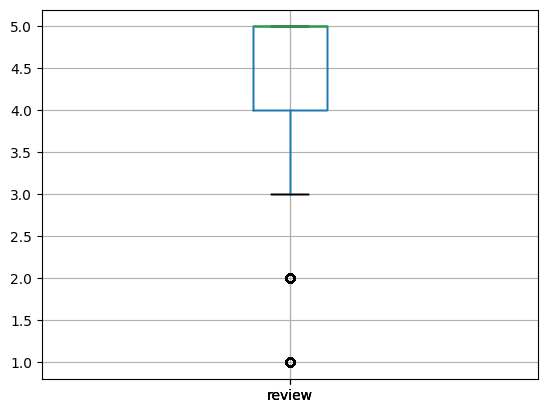

In [45]:
df_all_data_filtered_processed.boxplot(column=['review'])
plt.show()

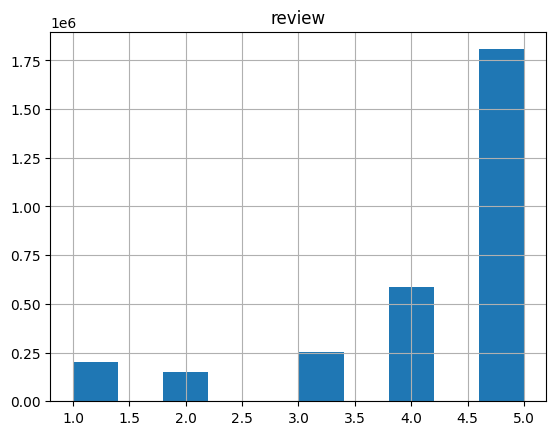

In [47]:
df_rating_processed.hist(column=['review'])
plt.show()

In [48]:
df_rating_processed[df_rating_processed['Title']== 'The Hobbit']['review'].mean()

KeyError: 'Title'

In [ ]:
df_rating_processed[df_rating_processed['Title']== 'The Hobbit']['review/score'].describe()

count    22023.000000
mean         4.657131
std          0.800452
min          1.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review/score, dtype: float64

In [ ]:

df_rating_processed[df_rating_processed['Title']== 'Atlas Shrugged']['review/score'].describe()

count    12513.000000
mean         4.028690
std          1.418635
min          1.000000
25%          3.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review/score, dtype: float64